
# **Contours**

**In this lesson we'll learn:**
1. Using findContours
2. Drawing Contours
3. Hierachy of Contours
4. Contouring Modes (Simple vs Approx) 

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(image, title="", size = 10):
    w, h = image.shape[:2]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)


**What are Contours?**

Contours are continous lines or curves that bound or cover the full boundary of an object.

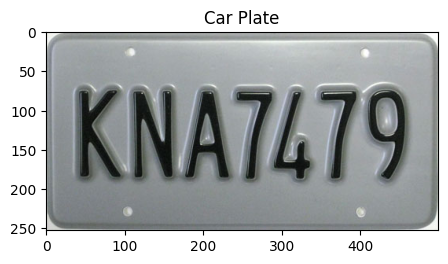

In [7]:
image= cv2.imread('images/car_plate.jpg')
imshow(image, 'Car Plate')

 **Applying cv2.findContours()**

```cv2.findContours(image, Retrieval Mode, Approximation Method)```

**Retrieval Modes**
- **RETR_LIST** - Retrieves all the contours, but doesn't create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours. ie they all belongs to same hierarchy level.
- **RETR_EXTERNAL** - eturns only extreme outer flags. All child contours are left behind.
- **RETR_CCOMP** - This flag retrieves all the contours and arranges them to a 2-level hierarchy. ie external contours of the object (ie its boundary) are placed in hierarchy-1. And the contours of holes inside object (if any) is placed in hierarchy-2. If any object inside it, its contour is placed again in hierarchy-1 only. And its hole in hierarchy-2 and so on.
- **RETR_TREE** -  It retrieves all the contours and creates a full family hierarchy list. 

**Approximation Method Options**
- cv2.CHAIN_APPROX_NONE – Stores all the points along the line(inefficient!)
- cv2.CHAIN_APPROX_SIMPLE – Stores the end points of each line



Number of Contours found = 110


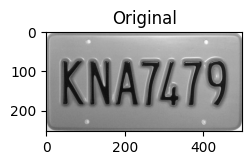

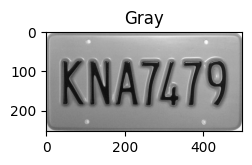

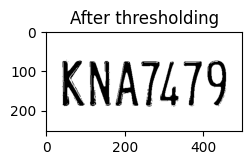

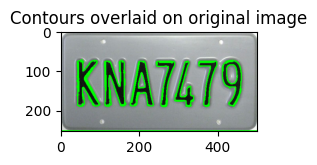

In [111]:
image= cv2.imread('images/car_plate.jpg')
imshow(gray, 'Original', 5)

gray= cv2.imread('images/car_plate.jpg', 0)
imshow(gray, 'Gray', 5)

ret, thresh= cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
imshow(thresh, 'After thresholding', 5)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy= cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)


# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), 2)
imshow(image, 'Contours overlaid on original image', 5)

print("Number of Contours found = " + str(len(contours)) )


In [49]:
image.dtype, type(image)

(dtype('uint8'), numpy.ndarray)

In [50]:
gray.dtype, type(gray)

(dtype('uint8'), numpy.ndarray)

In [51]:
image.shape, gray.shape

((253, 500), (253, 500, 3))

In [73]:
len(contours), hierarchy.shape

(110, (1, 110, 4))

In [103]:
contours[0], hierarchy[0,0]

(array([[[322, 190]],
 
        [[323, 189]],
 
        [[324, 189]],
 
        [[325, 189]],
 
        [[326, 190]],
 
        [[325, 191]],
 
        [[324, 191]],
 
        [[323, 191]]], dtype=int32),
 array([ 1, -1, -1, -1], dtype=int32))

 **What happens if we don't threshold? Bad things...**

Number of Contours found = 1


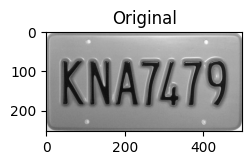

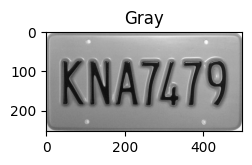

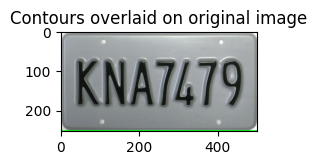

In [106]:
image= cv2.imread('images/car_plate.jpg')
imshow(gray, 'Original', 5)

gray= cv2.imread('images/car_plate.jpg', 0)
imshow(gray, 'Gray', 5)

# ret, thresh= cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
# imshow(thresh, 'After thresholding', 5)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy= cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)


# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), 2)
imshow(image, 'Contours overlaid on original image', 5)

print("Number of Contours found = " + str(len(contours)) )


**NOTE: For findContours to work, the background has to be black and foreground (i.e. the text or objects)** 

**Otherwise you'll need to invert the image by using cv2.bitwise_not(input_image)**

**We can use Canny Edges instead of Thresholding**

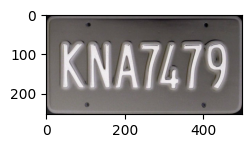

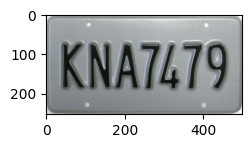

In [129]:
image= cv2.imread('images/car_plate.jpg')

image_reverse= cv2.bitwise_not(image)
imshow(image_reverse, "", 5)
imshow(image, "", 5)

Number of Contours found = 111


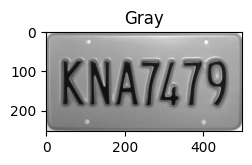

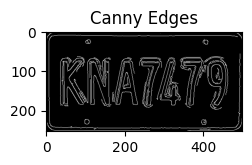

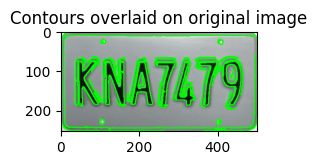

In [130]:
image= cv2.imread('images/car_plate.jpg')
#imshow(gray, 'Original', 5)

#gray= cv2.imread('images/car_plate.jpg', 0)
gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow(gray, 'Gray', 5)

edged= cv2.Canny(gray, 30, 200)
imshow(edged, "Canny Edges", 5)

# Finding Contours
contours, hierarchy= cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), 2)
imshow(image, 'Contours overlaid on original image', 5)

print("Number of Contours found = " + str(len(contours)))


**Remember these Countouring Steps**

1. Grayscale
2. Threshold or Canny Edge Detection to Binarize image

**Note:** Blurring before Step 2 is recommended to remove noisy contours

**Retreival Modes** 

Official Doc - https://docs.opencv.org/master/d9/d8b/tutorial_py_contours_hierarchy.html

**Hierachry**

This array stores 4 values for each contour:
- First term is the index of the Next contour
- Second term is the index of the Previous contour
- Third term is the index of the parent contour
- Forth term is the index of the child contour

## Retrieval Modes

### **RETR_LIST**
Retrieves all the contours, but doesn't create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours. ie they all belongs to same hierarchy level.

Number of Contours found = 110


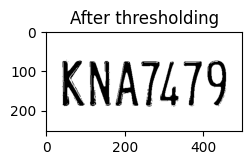

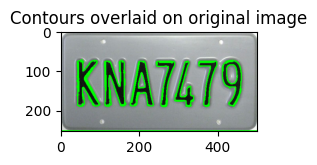

In [138]:
image= cv2.imread('images/car_plate.jpg')

gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_,thresh= cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow(thresh, 'After thresholding', 5)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy= cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), 2)
imshow(image, 'Contours overlaid on original image', 5)

print("Number of Contours found = " + str(len(contours)))


In [135]:
print(hierarchy)

[[[  1  -1  -1  -1]
  [  2   0  -1  -1]
  [  3   1  -1  -1]
  [  4   2  -1  -1]
  [  5   3  -1  -1]
  [  6   4  -1  -1]
  [  7   5  -1  -1]
  [  8   6  -1  -1]
  [  9   7  -1  -1]
  [ 10   8  -1  -1]
  [ 11   9  -1  -1]
  [ 12  10  -1  -1]
  [ 13  11  -1  -1]
  [ 14  12  -1  -1]
  [ 15  13  -1  -1]
  [ 16  14  -1  -1]
  [ 17  15  -1  -1]
  [ 18  16  -1  -1]
  [ 19  17  -1  -1]
  [ 20  18  -1  -1]
  [ 21  19  -1  -1]
  [ 22  20  -1  -1]
  [ 23  21  -1  -1]
  [ 24  22  -1  -1]
  [ 25  23  -1  -1]
  [ 26  24  -1  -1]
  [ 27  25  -1  -1]
  [ 28  26  -1  -1]
  [ 29  27  -1  -1]
  [ 30  28  -1  -1]
  [ 31  29  -1  -1]
  [ 32  30  -1  -1]
  [ 33  31  -1  -1]
  [ 34  32  -1  -1]
  [ 35  33  -1  -1]
  [ 36  34  -1  -1]
  [ 37  35  -1  -1]
  [ 38  36  -1  -1]
  [ 39  37  -1  -1]
  [ 40  38  -1  -1]
  [ 41  39  -1  -1]
  [ 42  40  -1  -1]
  [ 43  41  -1  -1]
  [ 44  42  -1  -1]
  [ 45  43  -1  -1]
  [ 46  44  -1  -1]
  [ 47  45  -1  -1]
  [ 48  46  -1  -1]
  [ 49  47  -1  -1]
  [ 50  48  -1  -1]


### **RETR_EXTERNAL**

Returns only extreme outer flags. All child contours are left behind.

Number of Contours found = 1


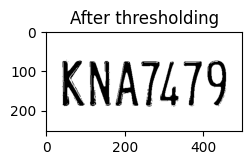

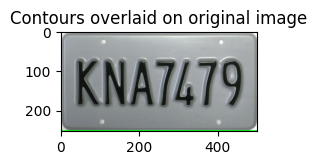

In [152]:
image= cv2.imread('images/car_plate.jpg')

gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#gray= cv2.imread('images/car_plate.jpg',0)

_,thresh= cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow(thresh, 'After thresholding', 5)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy= cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), 2)
imshow(image, 'Contours overlaid on original image', 5)

print("Number of Contours found = " + str(len(contours)))


In [137]:
print(hierarchy)

[[[-1 -1 -1 -1]]]


### **RETR_CCOMP**

Retrieves all the contours and arranges them to a 2-level hierarchy. ie external contours of the object (ie its boundary) are placed in hierarchy-1. And the contours of holes inside object (if any) is placed in hierarchy-2. If any object inside it, its contour is placed again in hierarchy-1 only. And its hole in hierarchy-2 and so on.

Number of Contours found = 110


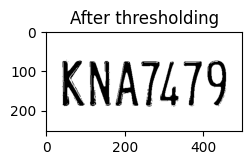

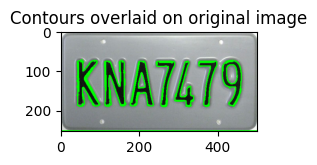

In [153]:
image= cv2.imread('images/car_plate.jpg')

gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#gray= cv2.imread('images/car_plate.jpg',0)

_,thresh= cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow(thresh, 'After thresholding', 5)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy= cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), 2)
imshow(image, 'Contours overlaid on original image', 5)

print("Number of Contours found = " + str(len(contours)))


In [154]:
print(hierarchy)

[[[  1  -1  -1  -1]
  [  2   0  -1  -1]
  [  3   1  -1  -1]
  [  4   2  -1  -1]
  [  5   3  -1  -1]
  [  6   4  -1  -1]
  [  7   5  -1  -1]
  [  8   6  -1  -1]
  [  9   7  -1  -1]
  [ 10   8  -1  -1]
  [ 11   9  -1  -1]
  [ 12  10  -1  -1]
  [ 13  11  -1  -1]
  [ 14  12  -1  -1]
  [ 15  13  -1  -1]
  [ 16  14  -1  -1]
  [ 17  15  -1  -1]
  [ 18  16  -1  -1]
  [ 19  17  -1  -1]
  [ 20  18  -1  -1]
  [ 21  19  -1  -1]
  [ 22  20  -1  -1]
  [ 23  21  -1  -1]
  [ 24  22  -1  -1]
  [ 25  23  -1  -1]
  [ -1  24  26  -1]
  [ 27  -1  -1  25]
  [ 28  26  -1  25]
  [ 29  27  -1  25]
  [ 30  28  -1  25]
  [ 31  29  -1  25]
  [ 32  30  -1  25]
  [ 33  31  -1  25]
  [ 34  32  -1  25]
  [ 35  33  -1  25]
  [ 36  34  -1  25]
  [ 37  35  -1  25]
  [ 38  36  -1  25]
  [ 39  37  -1  25]
  [ 40  38  -1  25]
  [ 41  39  -1  25]
  [ 42  40  -1  25]
  [ 43  41  -1  25]
  [ 44  42  -1  25]
  [ 45  43  -1  25]
  [ 46  44  -1  25]
  [ 47  45  -1  25]
  [ 48  46  -1  25]
  [ 49  47  -1  25]
  [ 50  48  -1  25]


### **RETR_TREE**
It retrieves all the contours and creates a full family hierarchy list.

Number of Contours found = 110


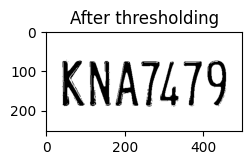

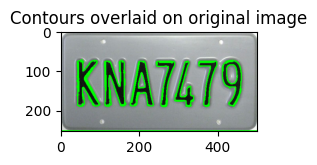

In [158]:
image= cv2.imread('images/car_plate.jpg')

gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#gray= cv2.imread('images/car_plate.jpg',0)

_,thresh= cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow(thresh, 'After thresholding', 5)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy= cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), 2)
imshow(image, 'Contours overlaid on original image', 5)

print("Number of Contours found = " + str(len(contours)))


In [159]:
print(hierarchy)

[[[ -1  -1   1  -1]
  [  2  -1  -1   0]
  [  3   1  -1   0]
  [  4   2  -1   0]
  [  5   3  -1   0]
  [  6   4  -1   0]
  [  7   5  -1   0]
  [  8   6  -1   0]
  [  9   7  -1   0]
  [ 10   8  -1   0]
  [ 11   9  -1   0]
  [ 12  10  -1   0]
  [ 13  11  -1   0]
  [ 14  12  -1   0]
  [ 15  13  -1   0]
  [ 16  14  -1   0]
  [ 17  15  -1   0]
  [ 18  16  -1   0]
  [ 19  17  -1   0]
  [ 20  18  -1   0]
  [ 21  19  -1   0]
  [ 22  20  -1   0]
  [ 23  21  -1   0]
  [ 24  22  -1   0]
  [ 25  23  -1   0]
  [ 26  24  -1   0]
  [ 27  25  -1   0]
  [ 28  26  -1   0]
  [ 29  27  -1   0]
  [ 30  28  -1   0]
  [ 31  29  -1   0]
  [ 32  30  -1   0]
  [ 33  31  -1   0]
  [ 34  32  -1   0]
  [ 35  33  -1   0]
  [ 36  34  -1   0]
  [ 37  35  -1   0]
  [ 38  36  -1   0]
  [ 39  37  -1   0]
  [ 40  38  -1   0]
  [ 41  39  -1   0]
  [ 42  40  -1   0]
  [ 43  41  -1   0]
  [ 44  42  -1   0]
  [ 45  43  -1   0]
  [ 46  44  -1   0]
  [ 47  45  -1   0]
  [ 48  46  -1   0]
  [ 49  47  -1   0]
  [ 50  48  -1   0]


In [170]:
len(contours), hierarchy.shape

(110, (1, 110, 4))

## **Contouring Modes**

**CHAIN_APPROX_NONE**

Number of Contours found = 110


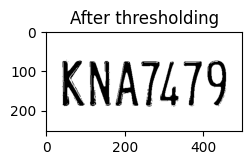

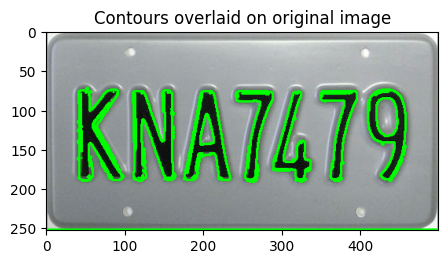

In [180]:
image= cv2.imread('images/car_plate.jpg')

gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#gray= cv2.imread('images/car_plate.jpg',0)

_,thresh= cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow(thresh, 'After thresholding', 5)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy= cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), 2)
imshow(image, 'Contours overlaid on original image', 10)

print("Number of Contours found = " + str(len(contours)))


In [177]:
for c in contours:
    print(len(c))

1502
8
14
4
4
7
4
4
4
4
4
6
4
6
4
12
35
4
4
4
9
6
4
6
7
4
4
4
4
4
4
6
14
4
7
6
4
6
8
4
13
4
4
4
4
6
4
16
8
28
42
7
12
6
10
4
18
6
12
6
8
12
8
12
6
22
4
6
14
8
12
4
12
4
12
6
301
4
6
72
386
6
342
8
68
447
9
94
18
4
4
638
2
11
4
1
140
4
298
118
35
509
1
6
8
1
1
148
2
4


#### **CHAIN_APPROX_SIMPLE**

Number of Contours found = 110


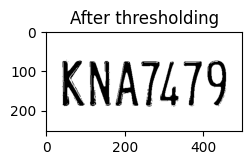

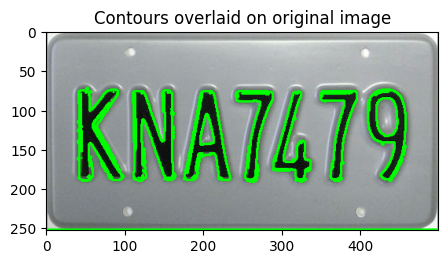

In [181]:
image= cv2.imread('images/car_plate.jpg')

gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#gray= cv2.imread('images/car_plate.jpg',0)

_,thresh= cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow(thresh, 'After thresholding', 5)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy= cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), 2)
imshow(image, 'Contours overlaid on original image', 10)

print("Number of Contours found = " + str(len(contours)))


In [179]:
for c in contours:
    print(len(c))

4
6
6
4
4
6
4
4
4
4
4
6
4
6
4
8
19
4
4
4
8
6
4
6
6
4
4
4
4
4
4
6
6
4
6
6
4
6
6
4
11
4
4
4
4
6
4
6
6
19
18
6
6
6
6
4
15
6
6
6
6
6
6
6
6
18
4
6
6
6
6
4
6
4
6
6
96
2
2
8
165
2
127
2
5
189
6
41
6
4
4
201
2
9
2
1
6
2
117
53
16
230
1
4
7
1
1
9
2
4
